<h1 style="color:blue; font-size: 30px; border-style:solid; padding: 10px;"> Boston House Prices Analysis - Aidan O'Connor G00364756</h1>

## Contents

1.  Project Objectives
2.  Project Plan
3.  Boston House Prices Dataset - About
4.  Analysis
5.  Conclusion
6.  References

## 1. Project Objectives

<b>Instructions as per Dr. Ian McGloughlin's guidance document</b>

This assessment concerns the well-known Boston House Prices dataset and the
Python packages scipy, keras, and jupyter. The project is worth 100%
of your marks for this module, but it is broken into three parts, as follows.

<b>(20%) Describe:</b> Create a git repository and make it available online for the lecturer
to clone. The repository should contain all your work for this assessment. Within
the repository, create a jupyter notebook that uses descriptive statistics and
plots to describe the Boston House Prices dataset. This part is worth 20% of
your overall mark.

<b>(20%) Infer:</b> To the above jupyter notebook, add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should
explain and discuss your findings within the notebook. This part is also worth
20%.

<b>(60%) Predict:</b> Again using the same notebook, use keras to create a neural network
that can predict the median house price based on the other variables in the dataset.
Page 1 of 3
You are free to interpret this as you wish — for example, you may use all the other
variables, or select a subset. This part is worth 60%.


## 2. Project Plan

* Research the significance of the Boston House Prices Dataset
* Find the Boston House Prices Dataset and load it into the jupyter notebook
* Analysis
    - Descriptive Statistics
    - Create Regression Model
    - Inferential Statistical Analysis
    - Neural Network Prediction
* Describe results
* Conclusions - Were the objectives fulfilled?

## 3. Boston House Prices Analysis - About

The Boston House Prices Dataset is one which relates to houses in a number of locations in Boston and their key attributes.
Its origins stem from a paper that was pubished in Economics & Management, vol.5, 81-102, 1978 by Harrison, D. and Rubinfeld, D.L. entitled 'Hedonic prices and the demand for clean air' [[1]](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf). The objective of the paper was to investigate methodological problems associated with the use of housing market data to measure the willingness to pay for clean air.

## 4. Analysis

### Loading Python packages and Boston House Prices Dataset

Before analysis of the Boston House Price Dataset can be done the necessary environment must be created (i.e. loading the necessary Python packages for exploratory analysis) and the dataset must be loaded into the jupyter notebook.

In [1]:
# Loading Python packages.
import sklearn as sk
import pandas as pd
import numpy as np
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.linear_model import LinearRegression
from scipy.stats import median_test
%matplotlib inline

# Loading Boston House Prices Dataset from scikit-learn.
# Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
boston = load_boston()

    # ...NOTE_Mistake 1: I originally thought that this was a dataframe, did some research and found out how to convert a dataset to a dataframe.
    # boston.index
    # boston.head()
    # boston.describe()
    # print(boston)
    # details1 = boston.data # This is the actual Boston House Prices data
    # details2 = boston.target # This is the linear regression targets
    # details3 = boston.feature_names # This is the names of the columns i.e. the index
    # details4 = boston.DESCR # This is a full description of the Boston House Prices Dataset
    # details5 = boston.filename # Name of file (sklearn dataset - returns the name [i.e. location] of file on your machine)
    # print(details5)
    # pandas index, head, describe attributes do not work on datasets, only dataframes. "boston" is not the data, it is the full dataset including full description etc...

### Scikit-learn Information on Boston House Prices Dataset

Through trial and error I realised that the Boston House Prices Scikit-learn file that is loaded is actually a "dictionary" rather than a dataset. The dataset is contained in the dictionary with other important information relating to the dataset. It was necessary to explore the dictionary and extract the key information to allow for analysis of the dataset. Target referes to the price of the houses

<img src="pics\boston_dataset_attributes.png" width="900" height="700" align="center">

### Extracting the dataset and relevant information from the dictionary

In [2]:
# Acquiring the attributes of the dictionary
# Adapted from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
# Adapted from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
# Need to convert the dataset to a pandas dataframe to perform exploratory analysis

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Determining what the acronyms stand form in relation to this dataset by printing DESCR attribute.

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Descriptive Statistics

In [5]:
df.shape

(506, 14)

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

#### Pairplot - Using it to have a quick look at the relationships between the independent variables and the dependent variable "PRICE"

In [11]:
#sns.pairplot(df)

### Inferential Statistics
#### Plotting a Distribution Plot of Price & Categorical Scatterplot of house prices along/not along Charles River

Text(0, 0.5, 'House Price')

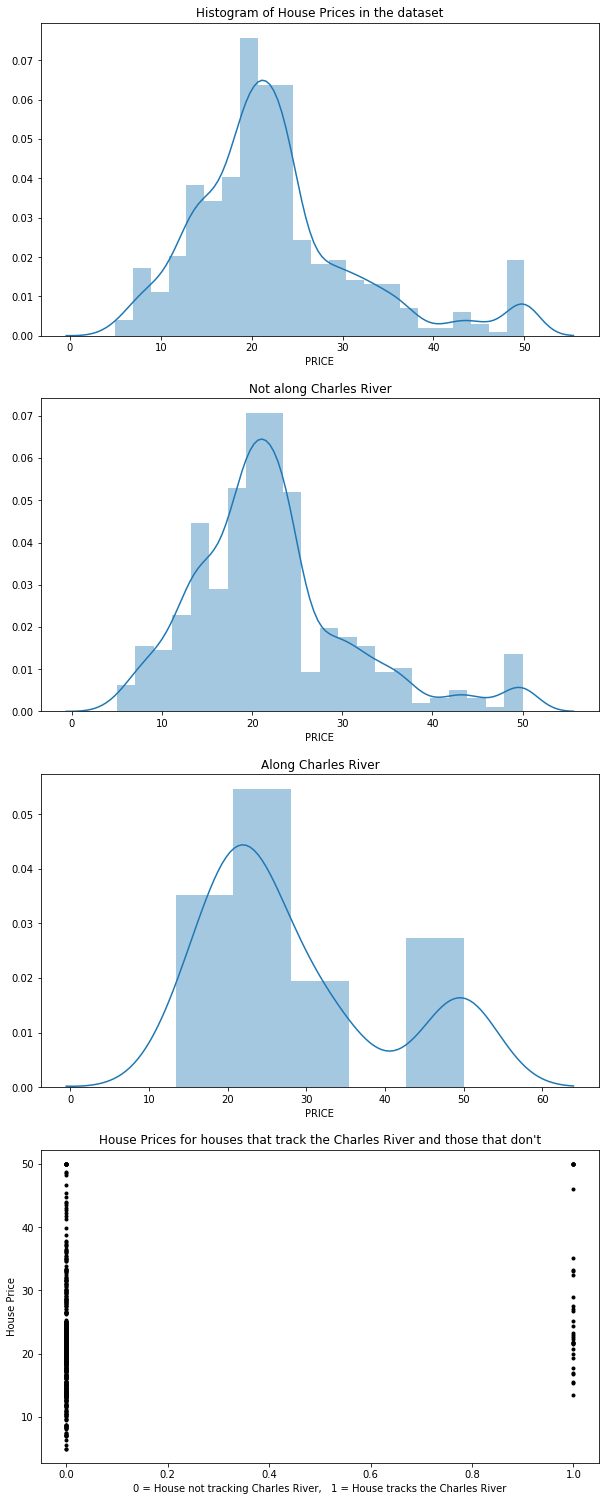

In [12]:
# Set x value to independent variable that determines whether the house tracks the Charles River.
x = df['CHAS']
# Set y value to the house price.
y = df['PRICE']
z0 = df[df['CHAS'] == 0]['PRICE']
z1 = df[df['CHAS'] == 1]['PRICE']

# Change size and margins of subplots - Adapted from https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots
# And https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py
plt.subplots(3,1,figsize=(10,10))
plt.subplots_adjust(bottom=2, top=4)

# Subplot 1: Plot of the distribution of House Prices not along Charles River
plt.subplot(411)
plt.title("Histogram of House Prices in the dataset")
#sns.distplot(y)
sns.distplot(y)

# Subplot 1: Plot of the distribution of House Prices not along Charles River
plt.subplot(412)
plt.title("Not along Charles River")
#sns.distplot(y)
sns.distplot(z0)

# Subplot 2: Plot of the distribution of House Prices along Charles River
plt.subplot(413)
plt.title("Along Charles River")
sns.distplot(z1)

# Subplot 3: Categorical variable "CHAR" vs House Price "PRICE"
plt.subplot(414)
plt.plot(x, y, 'k.')
plt.title("House Prices for houses that track the Charles River and those that don't")
plt.xlabel("0 = House not tracking Charles River,   1 = House tracks the Charles River")
plt.ylabel("House Price")


#### Plotting a boxplot, violinplot and beanplot of the House Prices along/not along the Charles River

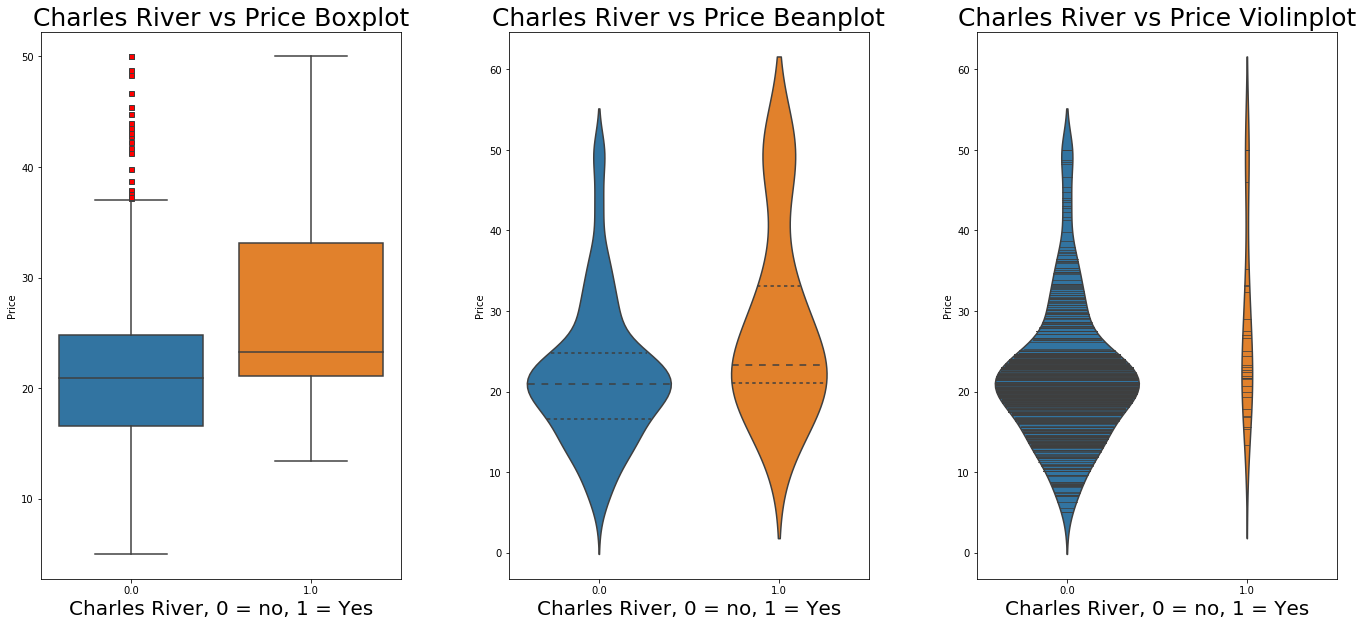

In [13]:
# Adapted from Fundamentals of Data Analytics Project by Aidan O'Connor - https://github.com/G00364756/52446---Fundamentals-of-Data-Analysis---Project
# Plotting a boxplot, violinplot and beanplot for house prices between houses that are along the Charles river and those that aren’t

# Subplot 1: Boxplot of Price, Boston House Pricing dataset.
plt.subplot(131)
sns.boxplot(x=df['CHAS'], y=df["PRICE"], whis=1.5, flierprops=dict(markerfacecolor='r', marker='s'), orient="v") 
plt.title("Charles River vs Price Boxplot", fontsize=25)
plt.xlabel("Charles River, 0 = no, 1 = Yes", fontsize=20)
plt.ylabel("Price")

# Subplot 2: Violinplot of Price, Boston House Pricing dataset.
plt.subplot(132)
sns.violinplot( inner="quart", x=df['CHAS'], y=df["PRICE"], whis=1.5, orient="v")
plt.title("Charles River vs Price Beanplot", fontsize=25)
plt.xlabel("Charles River, 0 = no, 1 = Yes", fontsize=20)
plt.ylabel("Price")

# Subplot 3: Beanplot of Price, Boston House Pricing dataset.
plt.subplot(133)
sns.violinplot(x=df['CHAS'], y=df["PRICE"], whis=1.5, scale="count", inner="stick", orient="v")
plt.title("Charles River vs Price Violinplot", fontsize=25)
plt.xlabel("Charles River, 0 = no, 1 = Yes", fontsize=20)
plt.ylabel("Price")

plt.subplots_adjust(left=0, bottom=0.1, right=3, top=2, wspace=0.30, hspace=0.30)

plt.show()

It appears that the histograms of house prices in relation to the categorical variable "CHAS" are resulting in bimodal histograms (moreso apparent in the histogram for houses that track the Charles River) which may suggest that other processes are at play, in the determination of house prices in Boston. This is highly likely, as many other variables exist in this dataset.

Significance of Biomodal distributions:  http://www.statit.com/support/quality_practice_tips/histograms.shtml

I was initially trying to determine whether the populations were normally distributed, to ensure the correct hypothesis test was used in the determination of whether the medians for each population differ in any meaningful way.

On observation of the shape of both histograms I have decided to use a nonparametric hypothesis test for the median values. Nonparametric hypothesis tests do not assume that the populations are distributed in any specific shape. In my opinion it is more conservative to use this class of test.


When to use each type of hypothesis test: https://www.isixsigma.com/tools-templates/hypothesis-testing/nonparametric-distribution-free-not-assumption-free/
Nonparametric Hyphothesis Test: https://www.isixsigma.com/tools-templates/hypothesis-testing/understanding-uses-moods-median-test/

The boxplot above suggests the possible presence of outliers in the data for the houses that do not track the Charles River. Mood's median test may be the most appropriate test to use in this case, as it is a more robust test in cases where outliers may be in existance.

Mood’s median test does have some assumptions associated with it. The assumptions are that the data from each population is an independent random sample and the population distributions have the same shape. The population distributions do appear to have a similar shape in the histogram's as they are both bimodal. A normaility test may be conducted to determine this. The normality test I have chosen to use in this instance is a qualitative one by comparing the distribution plots previously created in this notebook. Statistical tests can be done also.

Normality testing: https://www.isixsigma.com/tools-templates/hypothesis-testing/nonparametric-distribution-free-not-assumption-free/


In [14]:
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html
g1 = df[df['CHAS'] == 0]['PRICE']
med1 = np.median(g1)
g2 = df[df['CHAS'] == 1]['PRICE']
med2 = np.median(g2)
# Create random sample from population 1 (i.e. houses that do not track the Charles River)
G1 = df[df['CHAS'] == 0]['PRICE'].sample(n=15, random_state=1)
# Create random sample from population 2 (i.e. houses that do not track the Charles River)
G2 = df[df['CHAS'] == 1]['PRICE'].sample(n=15, random_state=1)

# Mood's Median test from scipy
stat, p, med, tbl = median_test(G1, G2)

print("Median of the population not tracking Charles River :", med1)
print("Median of the population tracking Charles River:", med2)

Median of the population not tracking Charles River : 20.9
Median of the population tracking Charles River: 23.3


In [15]:
print(" stat=",stat,"\n","p=",p,"\n","med=",med,"\n","tbl=",tbl)

 stat= 0.5333333333333333 
 p= 0.4652088184521417 
 med= 23.8 
 tbl= [[6 9]
 [9 6]]


When Mood's Median Test is conducted on both of the population sample's (i.e DOes not trakc Charles River and Tracks Charles River) the grand median is 23.8.

The p-value is 0.4927166. This is greater than the Alpha p-value for Mood's Median Test. The null hypothesis of identical medians for the populations cannot be rejected. This result would suggest that the populations have the same median. However caution is advised here as the probability of seeing such a result is 47% (i.e. stat = 0.470588). There is almost a 50:50 chance of result above the Alpha p-value. <p style="color:red;">Check this! I'm not sure this is correct, think "stat" is the t statistic, need more research on this topic </p>

https://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005
https://mchankins.wordpress.com/2013/04/21/still-not-significant-2/

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

These links are the key to using Mood's median test as offered by scipy
https://www.isixsigma.com/tools-templates/hypothesis-testing/understanding-uses-moods-median-test/
https://www.isixsigma.com/tools-templates/hypothesis-testing/nonparametric-distribution-free-not-assumption-free/

### Creating the Multi-linear Regression Model

In [16]:
# Using CRIM and PRICE to create an example of a Regression Model
# Change this to come up with a regression model for the combined independent variables****
# Will be using Keras to fit a regression model to the data, important to try to sense check as rubbish in = rubbish out

x = df['CHAS']
             #df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = df['PRICE']


In [17]:
# Adapted from Dr. Ian McGloughlin's lecture, polyfot linear regression is not appropriate for these c and y values.
# Merely practicing while following the lecture videos, will change this section later.

m, c = np.polyfit(x,y,1)

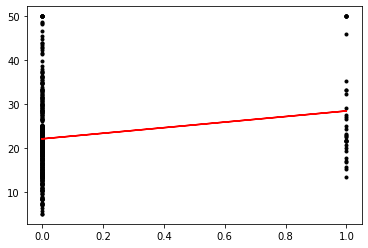

In [18]:
# Linear regression not appropriate in this instance, will be adapting later.
plt.plot(x, y, 'k.')

plt.plot(x,x*m + c, 'r-')

## Machine Learning

### Classifier

In [19]:
# Adapted from lecture on knn nearest neighbours by Dr. Ian Mcgloughlin
# Entered as a placeholder will not be using this scikit learn module
# Will be using Keras when covered in module

knn = nei.KNeighborsClassifier(n_neighbors=12)

### Fit

In [20]:
knn.fit(inputs, outputs)

NameError: name 'inputs' is not defined

### Predict

In [ ]:
knn.predict([[### Insert values to predict ###]])

### Evaluate

In [ ]:
(knn.predict(inputs) == outputs).sum()

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)
knn = nei.KNeighborsClassifier(n_neighbors=12)
knn.fit(inputs_train, outputs_train)

In [ ]:
(knn.predict(inputs_test) == outputs_test).sum()

## 5. Results

## 6. Conclusions

## 6. References

[[1]](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf): Hedonic Housing Prices and the Demand for Clean Air, JOURNAL OF ESVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 (1978)

[[2]](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155): Linear Regression on Boston Housing Dataset

[[3]](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef): Learning Data Science: Day 9 - Linear Regression on Boston Housing Dataset